# Setup for the data and Libraries

In [1]:
#importing Libraries from Preprocessing and data plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import random as rand
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import seaborn as sns

2023-02-07 03:09:00.132839: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-07 03:09:00.132877: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-07 03:09:01.118278: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-07 03:09:01.118421: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-07 03:09:01.118436: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [2]:
#reading data from cvs
df = pd.read_csv("ultimate_data.csv").drop("Unnamed: 0", axis=1)
df.head()

,source of drinking water (simplified),time to get to water source (minutes),location of source for water
0,piped into dwelling,NaN,NaN
1,piped into dwelling,NaN,NaN
2,piped into dwelling,NaN,NaN
3,piped into dwelling,NaN,NaN
4,piped into dwelling,NaN,NaN


In [3]:
#spliltiing missing data and entrrying random values to the newly created data frame(only missing values)
Train = pd.DataFrame()
dumy, df = df.dropna(), df
df["time to get to water source (minutes)"].fillna(-1, inplace=True)
for col in df.columns:
    df.fillna("?", inplace=True)
    val = dumy[col].unique()
    Train[col] = [rand.choice(val) if(i=="?" or i==-1) else i for i in df[col]]
Train.shape, df.shape

((970636, 3), (970636, 3))

# Data Preprocessing

In [4]:
df.head()

,source of drinking water (simplified),time to get to water source (minutes),location of source for water
0,piped into dwelling,-1.0,?
1,piped into dwelling,-1.0,?
2,piped into dwelling,-1.0,?
3,piped into dwelling,-1.0,?
4,piped into dwelling,-1.0,?


In [5]:
Train.head()

,source of drinking water (simplified),time to get to water source (minutes),location of source for water
0,piped into dwelling,9.0,in own yard/plot
1,piped into dwelling,52.0,in own dwelling
2,piped into dwelling,402.0,elsewhere
3,piped into dwelling,623.0,in own yard/plot
4,piped into dwelling,67.0,in own dwelling


In [6]:
#encoding Data into labels by Label encoder from sklearn
lb = LabelEncoder()
for i in df.columns:
    lb.fit(df[i])
    df[i] = lb.transform(df[i])
    Train[i] = lb.transform(Train[i])

In [7]:
df.head()

,source of drinking water (simplified),time to get to water source (minutes),location of source for water
0,4,0,0
1,4,0,0
2,4,0,0
3,4,0,0
4,4,0,0


In [8]:
Train.head()

,source of drinking water (simplified),time to get to water source (minutes),location of source for water
0,4,10,3
1,4,53,2
2,4,220,1
3,4,254,3
4,4,68,2


# Modeling and Learning

In [9]:
#creating a simple multilayered auto-encoder model
model = Sequential()

model.add(Dense(256, activation="relu", input_shape=(3,)))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(3, activation="relu"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1024      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 64)                2

2023-02-07 03:09:06.341975: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-02-07 03:09:06.342012: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Hassan-Ibrar): /proc/driver/nvidia/version does not exist


In [10]:
#compiling model(adding hyperparameters)
model.compile(loss="MSE", optimizer="adam", metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(np.array(df),np.array(Train), epochs=10)

Epoch 1/10
30333/30333 [==============================] - 109s 4ms/step - loss: 166.3180 - root_mean_squared_error: 12.8964
Epoch 2/10
30333/30333 [==============================] - 101s 3ms/step - loss: 156.9902 - root_mean_squared_error: 12.5296
Epoch 3/10
30333/30333 [==============================] - 105s 3ms/step - loss: 156.4211 - root_mean_squared_error: 12.5068
Epoch 4/10
30333/30333 [==============================] - 106s 3ms/step - loss: 155.8125 - root_mean_squared_error: 12.4825
Epoch 5/10
30333/30333 [==============================] - 106s 4ms/step - loss: 155.7949 - root_mean_squared_error: 12.4817
Epoch 6/10
30333/30333 [==============================] - 104s 3ms/step - loss: 155.6165 - root_mean_squared_error: 12.4746
Epoch 7/10
30333/30333 [==============================] - 104s 3ms/step - loss: 155.3978 - root_mean_squared_error: 12.4659
Epoch 8/10
30333/30333 [==============================] - 104s 3ms/step - loss: 155.3715 - root_mean_squared_error: 12.4648
Epoch 9/

# Result

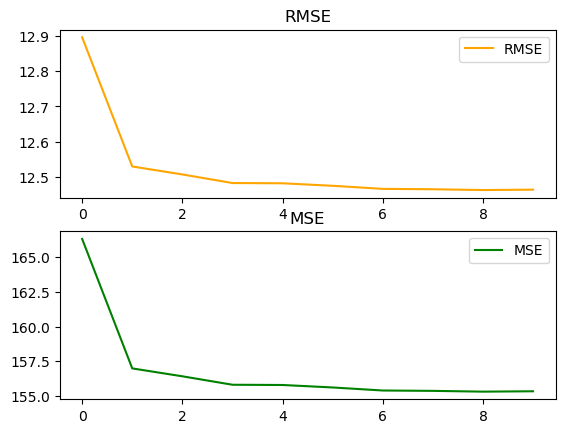

In [11]:
#printing loss graph
plt.subplot(2,1,1)
plt.plot(history.history["root_mean_squared_error"], color='orange')
plt.legend(["RMSE"])
plt.title("RMSE")
plt.subplot(2,1,2)
plt.plot(history.history["loss"], color='green')
plt.legend(["MSE"])
plt.title("MSE")
plt.show()

In [12]:
#predicting data from missing dataframe
pre = model.predict(np.array(df))

30333/30333 [==============================] - 70s 2ms/step


/home/hassan_ibrar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


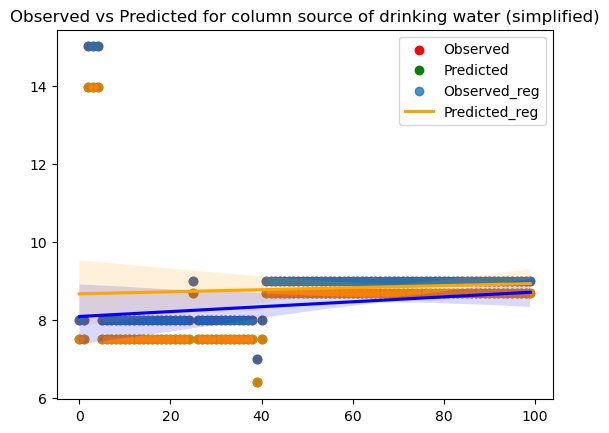

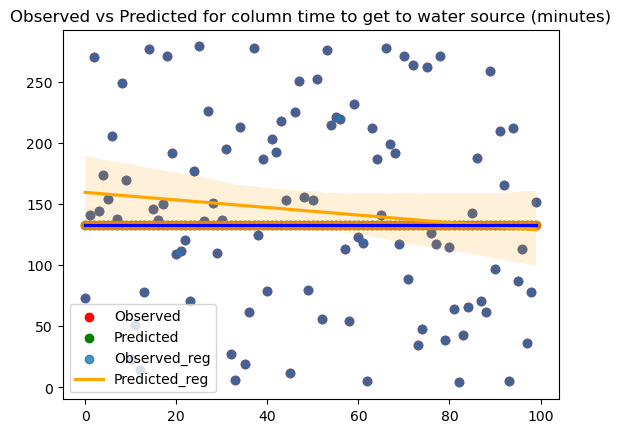

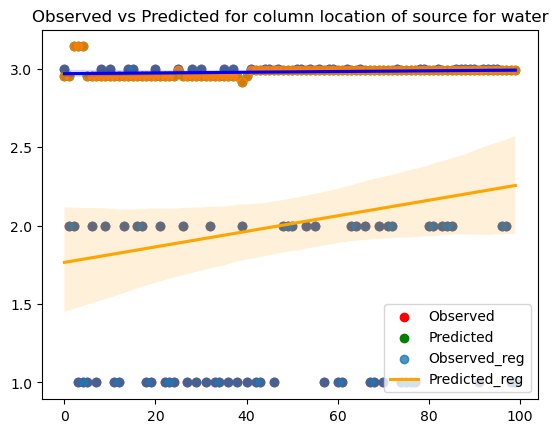

In [13]:
#plotting real vs predicted values
j=0
for col in df.columns:
    plt.scatter([i for i in range(100)], np.array(Train[col])[400:500], color="red")
    plt.scatter([i for i in range(100)], [i[j]*1.5 if j==2 else i[j] for i in pre[400:500]], color="green")
    sns.regplot([i for i in range(100)], np.array(Train[col])[400:500], line_kws={'color':'orange'})
    sns.regplot([i for i in range(100)], [i[j]*1.5 if j==2 else i[j] for i in pre[400:500]], line_kws={'color':'blue'})
    plt.legend(["Observed", "Predicted", "Observed_reg", "Predicted_reg"])
    plt.title(f"Observed vs Predicted for column {col}")
    plt.show()
    j+=1

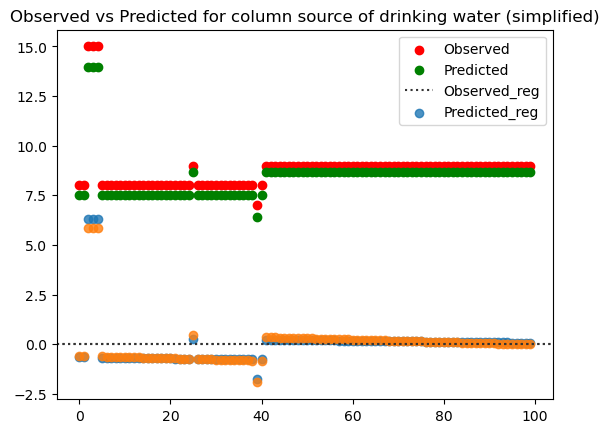

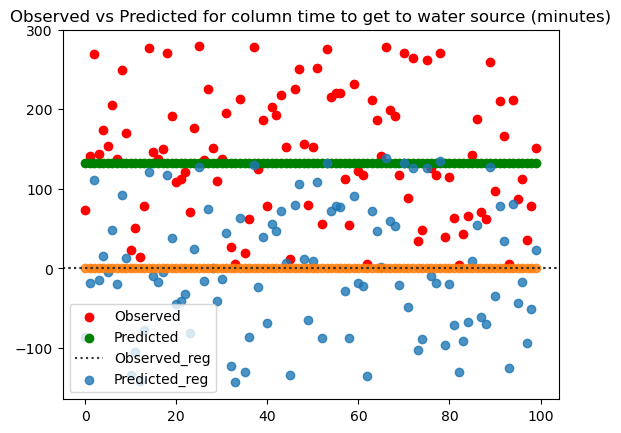

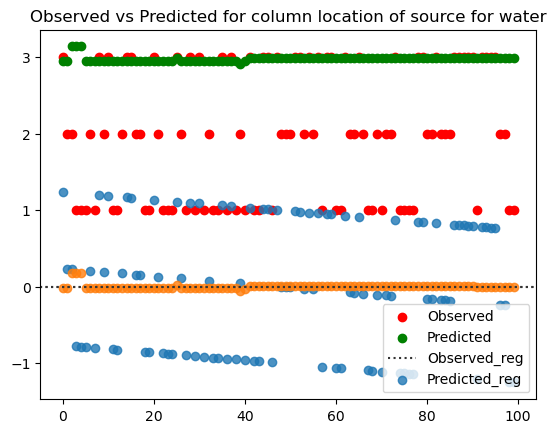

In [14]:
j=0
for col in df.columns:
    plt.scatter([i for i in range(100)], np.array(Train[col])[400:500], color="red")
    plt.scatter([i for i in range(100)], [i[j]*1.5 if j==2 else i[j] for i in pre[400:500]], color="green")
    sns.residplot([i for i in range(100)], np.array(Train[col])[400:500], line_kws={'color':'orange'})
    sns.residplot([i for i in range(100)], [i[j]*1.5 if j==2 else i[j] for i in pre[400:500]], line_kws={'color':'blue'})
    plt.legend(["Observed", "Predicted", "Observed_reg", "Predicted_reg"])
    plt.title(f"Observed vs Predicted for column {col}")
    plt.show()
    j+=1

# Checking the accuracy of the model by giving missing values

In [15]:
history = model.fit(np.array(Train),np.array(Train), epochs=10)

Epoch 1/10
30333/30333 [==============================] - 106s 3ms/step - loss: 0.0627 - root_mean_squared_error: 0.2503
Epoch 2/10
30333/30333 [==============================] - 106s 3ms/step - loss: 0.0541 - root_mean_squared_error: 0.2326
Epoch 3/10
30333/30333 [==============================] - 106s 3ms/step - loss: 0.0482 - root_mean_squared_error: 0.2194
Epoch 4/10
30333/30333 [==============================] - 106s 4ms/step - loss: 0.0438 - root_mean_squared_error: 0.2093
Epoch 5/10
30333/30333 [==============================] - 106s 4ms/step - loss: 0.0409 - root_mean_squared_error: 0.2021
Epoch 6/10
30333/30333 [==============================] - 105s 3ms/step - loss: 0.0406 - root_mean_squared_error: 0.2014
Epoch 7/10
30333/30333 [==============================] - 106s 3ms/step - loss: 0.0399 - root_mean_squared_error: 0.1997
Epoch 8/10
30333/30333 [==============================] - 105s 3ms/step - loss: 0.0342 - root_mean_squared_error: 0.1850
Epoch 9/10
30333/30333 [========

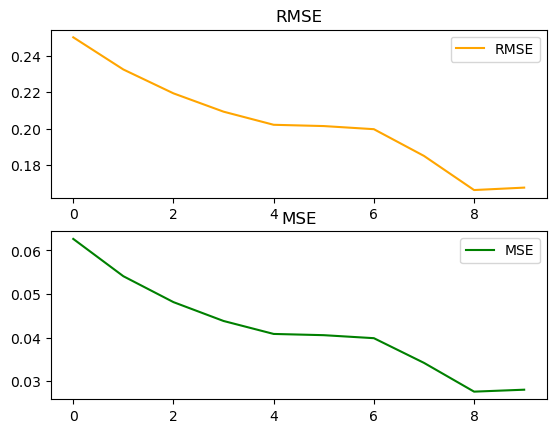

In [16]:
plt.subplot(2,1,1)
plt.plot(history.history["root_mean_squared_error"], color='orange')
plt.legend(["RMSE"])
plt.title("RMSE")
plt.subplot(2,1,2)
plt.plot(history.history["loss"], color='green')
plt.legend(["MSE"])
plt.title("MSE")
plt.show()

In [17]:
pre = model.predict(np.array(Train))

30333/30333 [==============================] - 69s 2ms/step


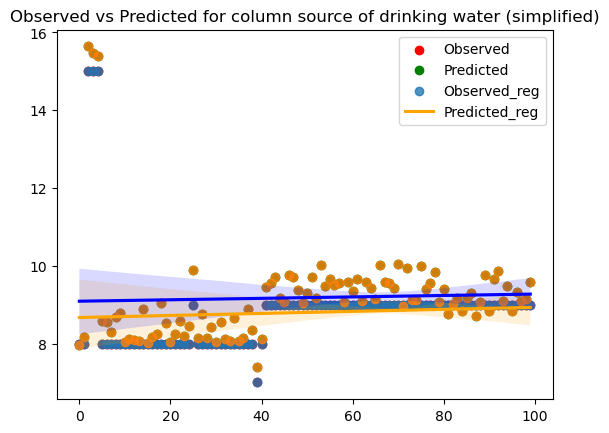

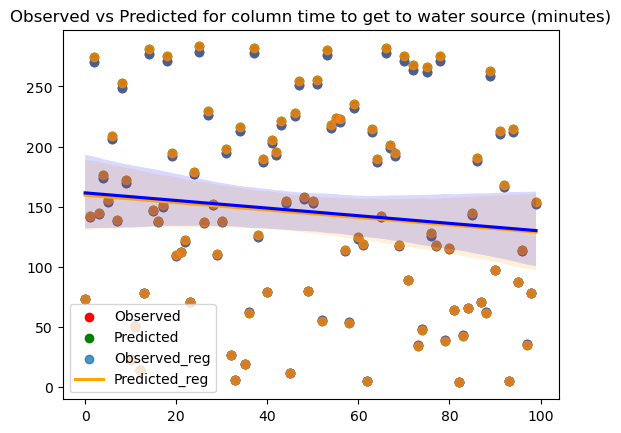

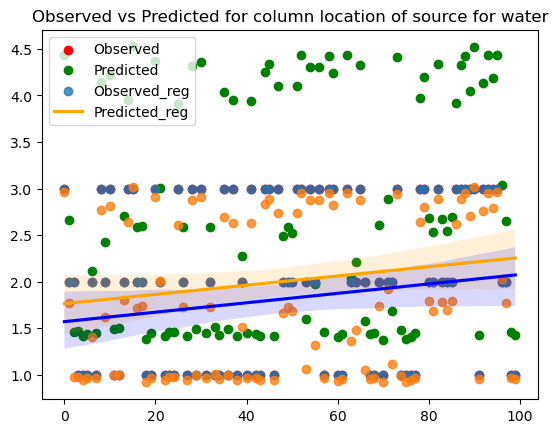

In [18]:
j=0
for col in df.columns:
    plt.scatter([i for i in range(100)], np.array(Train[col])[400:500], color="red")
    plt.scatter([i for i in range(100)], [i[j]*1.5 if j==2 else i[j] for i in pre[400:500]], color="green")
    sns.regplot([i for i in range(100)], np.array(Train[col])[400:500], line_kws={'color':'orange'})
    sns.regplot([i for i in range(100)], [i[j] for i in pre[400:500]], line_kws={'color':'blue'})
    plt.legend(["Observed", "Predicted", "Observed_reg", "Predicted_reg"])
    plt.title(f"Observed vs Predicted for column {col}")
    plt.show()
    j+=1

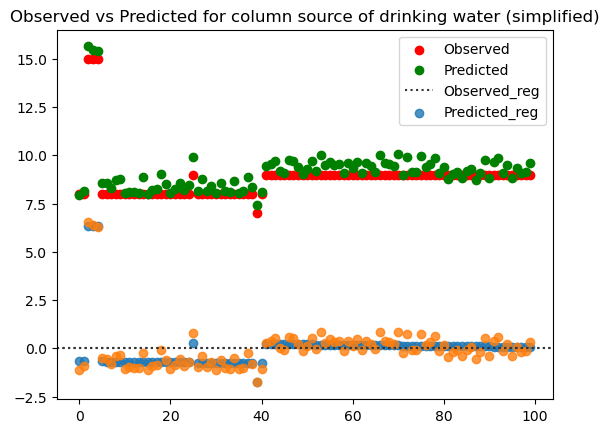

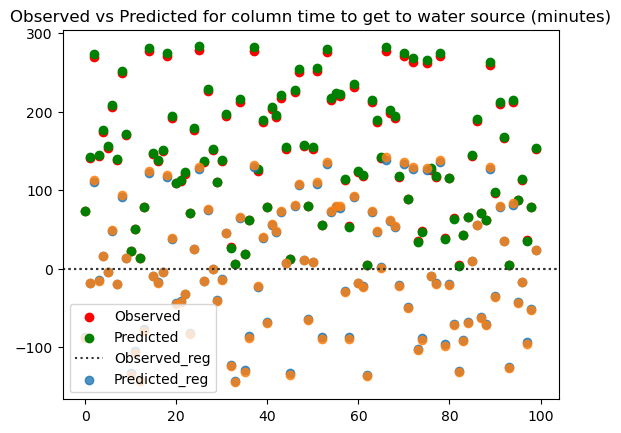

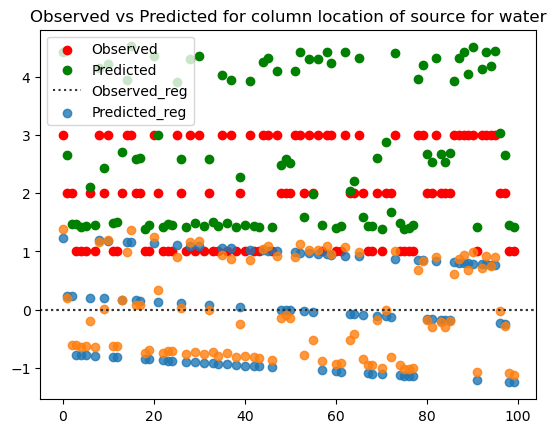

In [19]:
j=0
for col in df.columns:
    plt.scatter([i for i in range(100)], np.array(Train[col])[400:500], color="red")
    plt.scatter([i for i in range(100)], [i[j]*1.5 if j==2 else i[j] for i in pre[400:500]], color="green")
    sns.residplot([i for i in range(100)], np.array(Train[col])[400:500], line_kws={'color':'orange'})
    sns.residplot([i for i in range(100)], [i[j] for i in pre[400:500]], line_kws={'color':'blue'})
    plt.legend(["Observed", "Predicted", "Observed_reg", "Predicted_reg"])
    plt.title(f"Observed vs Predicted for column {col}")
    plt.show()
    j+=1